#**Task 1**

### **Importing** **The** **Libraries**

In [12]:
#import the libraries
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
from google.colab import files

uploaded = files.upload()

### **Reading the dataset**

In [63]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,Data,Date,Time,tweetcaption
0,0,tuesdayvibes,7/14/2020,07:00:21,Love it here vacation vibes amazing beautiful ...
1,1,realmeC11,7/14/2020,07:00:21,Best Camera Smartphone under 20k Please vote a...
2,2,KPSharmaOli,7/14/2020,07:00:21,shree Why should we have a problem with the pe...
3,3,RheaChakraborty,7/14/2020,07:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...
4,4,Stop_Transfer_Sunita_Yadav,7/14/2020,07:00:21,We stand for Sunita Yadav Stop the Transfer Wh...


### **Cleaning the texts**

In [64]:
#Clean the texts

#Create a function to clean the tweets 
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)#removes @mentions
  text = re.sub(r'#', '', text) #removes the #hashtags
  text = re.sub(r'RT[\S]+', '', text) #removes RT
  text = re.sub(r'https?:\/\/\s+', '', text) #removes the hyperlink

  return text

#Cleaning the text
df['tweetcaption'] = df['tweetcaption'].apply(cleanTxt)

#Show the cleaned text
df






,Unnamed: 0,Data,Date,Time,tweetcaption
0,0,tuesdayvibes,7/14/2020,07:00:21,Love it here vacation vibes amazing beautiful ...
1,1,realmeC11,7/14/2020,07:00:21,Best Camera Smartphone under 20k Please vote a...
2,2,KPSharmaOli,7/14/2020,07:00:21,shree Why should we have a problem with the pe...
3,3,RheaChakraborty,7/14/2020,07:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...
4,4,Stop_Transfer_Sunita_Yadav,7/14/2020,07:00:21,We stand for Sunita Yadav Stop the Transfer Wh...
...,...,...,...,...,...
5440,5440,t20worldcup,7/21/2020,23:59:32,Applications for the NSW ICC T20WorldCup Crick...
5441,5441,electricitybill,7/21/2020,23:59:32,Are you looking for professional Freelancer fo...
5442,5442,homeofdreams,7/21/2020,23:59:32,Virtual Home Tour check out this beauty in Mia...
5443,5443,oxfordvaccine,7/21/2020,23:59:32,The Oxford vaccine 1 3 had moderate sever chil...


### **Building Functions**
**Using** **TextBlob**

In [65]:
# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity 

# Create two new columns 
df['Subjectivity'] = df['tweetcaption'].apply(getSubjectivity)
df['Polarity'] = df['tweetcaption'].apply(getPolarity)

# Show the new dataframe with the new columns
df


,Unnamed: 0,Data,Date,Time,tweetcaption,Subjectivity,Polarity
0,0,tuesdayvibes,7/14/2020,07:00:21,Love it here vacation vibes amazing beautiful ...,0.534259,0.206296
1,1,realmeC11,7/14/2020,07:00:21,Best Camera Smartphone under 20k Please vote a...,0.524614,0.128278
2,2,KPSharmaOli,7/14/2020,07:00:21,shree Why should we have a problem with the pe...,0.725000,-0.037500
3,3,RheaChakraborty,7/14/2020,07:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,0.550000,0.100000
4,4,Stop_Transfer_Sunita_Yadav,7/14/2020,07:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,0.557792,0.174459
...,...,...,...,...,...,...,...
5440,5440,t20worldcup,7/21/2020,23:59:32,Applications for the NSW ICC T20WorldCup Crick...,0.354491,0.045455
5441,5441,electricitybill,7/21/2020,23:59:32,Are you looking for professional Freelancer fo...,0.455714,0.237937
5442,5442,homeofdreams,7/21/2020,23:59:32,Virtual Home Tour check out this beauty in Mia...,0.516190,0.306935
5443,5443,oxfordvaccine,7/21/2020,23:59:32,The Oxford vaccine 1 3 had moderate sever chil...,0.464286,-0.089881


### **Ploting WordCloud**

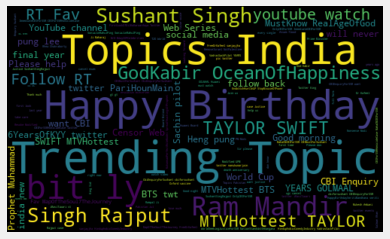

In [66]:
# Plot word cloud

allWords = ' '.join([twts for twts in df['tweetcaption']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [67]:
# Create a funtion to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)


#show the dataframe
df



,Unnamed: 0,Data,Date,Time,tweetcaption,Subjectivity,Polarity,Analysis
0,0,tuesdayvibes,7/14/2020,07:00:21,Love it here vacation vibes amazing beautiful ...,0.534259,0.206296,Positive
1,1,realmeC11,7/14/2020,07:00:21,Best Camera Smartphone under 20k Please vote a...,0.524614,0.128278,Positive
2,2,KPSharmaOli,7/14/2020,07:00:21,shree Why should we have a problem with the pe...,0.725000,-0.037500,Negative
3,3,RheaChakraborty,7/14/2020,07:00:21,Rhea Chakraborty s Heartbreaking Post On Susha...,0.550000,0.100000,Positive
4,4,Stop_Transfer_Sunita_Yadav,7/14/2020,07:00:21,We stand for Sunita Yadav Stop the Transfer Wh...,0.557792,0.174459,Positive
...,...,...,...,...,...,...,...,...
5440,5440,t20worldcup,7/21/2020,23:59:32,Applications for the NSW ICC T20WorldCup Crick...,0.354491,0.045455,Positive
5441,5441,electricitybill,7/21/2020,23:59:32,Are you looking for professional Freelancer fo...,0.455714,0.237937,Positive
5442,5442,homeofdreams,7/21/2020,23:59:32,Virtual Home Tour check out this beauty in Mia...,0.516190,0.306935,Positive
5443,5443,oxfordvaccine,7/21/2020,23:59:32,The Oxford vaccine 1 3 had moderate sever chil...,0.464286,-0.089881,Negative


### **Sentiment analysis**

In [68]:
# Create a function to calculate the sentiment score
def sentimentscores(sentiment):
    if sentiment=="Positive":
        return 1
   
    else :
        return 0

In [69]:
# Adding a column to show sentiment score

df['Sentiment_score']=df['Analysis'].apply(sentimentscores)

In [70]:
# Calculating positive and negative sentiment scores

pos=0
n=0
neg=0
avg_neg_score=[]
avg_pos_score=[]
for i in range(df.shape[0]):
    n=n+1
    if(df.Sentiment_score[i] == 0):
        neg=neg+1
    elif(df.Sentiment_score[i] == 1):
        pos=pos+1
   
    avg_pos_score.append(pos/n)
    avg_neg_score.append(neg/n)
   

In [71]:
# Adding two columns to show positive and negative sentiment scores

df['neg']=avg_neg_score
df['pos']=avg_pos_score

In [ ]:
#show the dataframe
df